# Applied ML Assignment 1

Name- Soham Sengupta                      
                   Roll No.- MDS202241

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import pickle
from tqdm import tqdm
import nltk
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import os
warnings.filterwarnings('ignore')

In [23]:
pip install seaborn --upgrade

   ---------------------------------------- 294.9/294.9 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.5.1 requires pandas!=1.4.0,<2.1,>1.1, but you have pandas 2.1.4 which is incompatible.
ydata-profiling 4.5.1 requires seaborn<0.13,>=0.10.1, but you have seaborn 0.13.2 which is incompatible.

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Function to load data from path

In [4]:
def load(file_path):
    return pd.read_csv(file_path)

Function to preprocess the data

In [3]:
def preprocess(df):
    # Lowercasing
    df['text'] = df['text'].apply(lambda x: x.lower())
    # Removing HTML tags
    df['text'] = df['text'].apply(lambda x: re.sub(r'<.*?>', '', x))
    # Removing URLs
    df['text'] = df['text'].apply(lambda x: re.sub(r'http[s]?://\S+', '', x))
    # Removing email addresses
    df['text'] = df['text'].apply(lambda x: re.sub(r'\S*@\S*\s?', '', x))
    # Removing punctuation and special characters
    df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-z0-9\s]', '', x))
    # Tokenization
    df['text'] = df['text'].apply(lambda x: word_tokenize(x))
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    df['text'] = df['text'].apply(lambda x: [word for word in x if word not in stop_words])
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    df['text'] = df['text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    # Joining tokens back to string
    df['text'] = df['text'].apply(lambda x: ' '.join(x))
    return df

In [15]:
def split(df, test_size=0.15, val_size=0.15):
    train_data, temp_data = train_test_split(df, test_size=test_size, random_state=41)
    validation_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=41)
    return train_data, validation_data, test_data

In [16]:
file_path = "D:/Applied ML/emails.csv"

In [17]:
if __name__ == "__main__":
    df = load(file_path)
    df = preprocess(df)
    train_data, validation_data, test_data = split(df)

In [18]:
df

,text,spam
0,subject naturally irresistible corporate ident...,1
1,subject stock trading gunslinger fanny merrill...,1
2,subject unbelievable new home made easy im wan...,1
3,subject 4 color printing special request addit...,1
4,subject money get software cd software compati...,1
...,...,...
5723,subject research development charge gpg forwar...,0
5724,subject receipt visit jim thanks invitation vi...,0
5725,subject enron case study update wow day super ...,0
5726,subject interest david please call shirley cre...,0


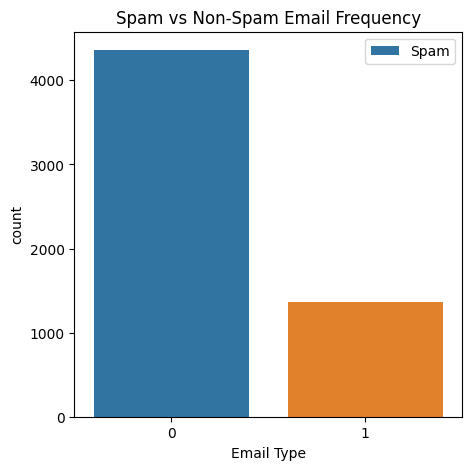

In [25]:
plt.figure(figsize = (5,5))
sns.countplot(data = df, x = 'spam')
plt.xlabel("Email Type")
plt.title("Spam vs Non-Spam Email Frequency")
plt.legend(["Spam","Non-Spam"])
plt.show()

The data is imbalanced

In [26]:
train_data

,text,spam
1080,subject avfs romanian software production expo...,1
2048,subject arthur andersen model validation reque...,0
2200,subject vacation shirley problem please coordi...,0
660,subject mortgage even worst credit zwzm detail...,1
2332,subject 4 00 pm budget meeting dave continue f...,0
...,...,...
5200,subject accounting adjustment kim fyi checked ...,0
4066,subject pleased get note wish could help respe...,0
3980,subject mscf speaker series pierre philippe ti...,0
931,subject sometimes always like idea chick horse...,1


In [27]:
test_data

,text,spam
5113,subject joe h vince mark tawney called said ne...,0
5596,subject ming sit vince thanks update anything ...,0
497,subject logo visual identity u thinking breath...,1
1664,subject houston trip hello everyone regarding ...,0
3814,subject enside good morning latest draft artic...,0
...,...,...
430,subject know attract customer website submitti...,1
5290,subject vince congratulation promotion regard nh,0
1735,subject p c spoke p c trisha tlapek location e...,0
361,subject ready earn take next step learn earn h...,1


In [28]:
validation_data

,text,spam
4098,subject carnegie mellon team meeting greeting ...,0
3283,subject stinson gibner richard actually need d...,0
1595,subject telephone interview enron research gro...,0
2607,subject houston trip hi jaideep first suggesti...,0
3940,subject summer houston visit richard agreed pa...,0
...,...,...
3020,subject feedback form vince feedback form foll...,0
2401,subject open enrollment 2001 open enrollment 2...,0
2432,subject new value lab fyi ajo forwarded amy ob...,0
4907,subject lloyd yes would useful told official b...,0


In [30]:
train_data.to_csv('train.csv', index=False)
validation_data.to_csv('validation.csv', index=False)
test_data.to_csv('test.csv', index=False)